# Task 2 - Data Preparation and Analysis

### In this task, two datasets generated - sources.csv and articles.csv have been cleaned and transformed in order to perform analysis on them.

#### API: News API (https://newsapi.org)

## Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import seaborn as sb
import matplotlib as mp
from matplotlib.ticker import MaxNLocator

In [2]:
articles = pd.read_csv('articles.csv') #read the articles CSV file
articles.head() #display the first few columns of the articles file

source_id       source_name                              author  \
0             wired             Wired                   Alistair Charlton   
1               NaN      The Guardian                          Rob Davies   
2               NaN      The Guardian        Matthew Weaver and Dan Milmo   
3  business-insider  Business Insider  ayork@insider.com (Alexandra York)   
4               NaN      The Guardian                    Veronica Horwell   

                                               title  \
0  Qualcomm Is Poised to Dominate EVs Before Appl...   
1  John Lewis faces criticism over plans to dilut...   
2  BBC urges staff to delete TikTok from company ...   
3  I turned my consultancy side hustle into a ful...   
4                           Jacqueline Gold obituary   

                                                 url  \
0  https://www.wired.com/story/electric-cars-qual...   
1  https://www.theguardian.com/business/2023/mar/...   
2  https://www.theguardian.com/technology/2023/ma...   
3  https://www.businessinsider.com/how-to-start-c...   
4  https://www.theguardian.com/business/2023/mar/...   

                                        url_to_image          published_at  \
0  https://media.wired.com/photos/6414db30b19ad4e...  2023-03-18T14:00:00Z   
1  https://i.guim.co.uk/img/media/460389afbf6f358...  2023-03-19T17:24:57Z   
2  https://i.guim.co.uk/img/media/3dc5b9d91c7cb2a...  2023-03-19T13:09:18Z   
3  https://i.insider.com/6414ae285f4f5400191a229f...  2023-03-18T13:35:00Z   
4  https://i.guim.co.uk/img/media/679575c7271599c...  2023-03-19T15:59:09Z   

  article_type  article_word_count  
0     business                  31  
1     business                  35  
2     business                  36  
3     business                  36  
4     business                  44

In [3]:
sources = pd.read_csv('sources.csv') #read the sources CSV file
sources.head()

source_id         source_name  \
0            abc-news            ABC News   
1         abc-news-au       ABC News (AU)   
2  al-jazeera-english  Al Jazeera English   
3        ars-technica        Ars Technica   
4    associated-press    Associated Press   

                                         description  \
0  Your trusted source for breaking news, analysi...   
1  Australia's most trusted source of local, nati...   
2  News, analysis from the Middle East and worldw...   
3  The PC enthusiast's resource. Power users and ...   
4  The AP delivers in-depth coverage on the inter...   

                          url    category country  
0      https://abcnews.go.com     general      us  
1  http://www.abc.net.au/news     general      au  
2    http://www.aljazeera.com     general      us  
3      http://arstechnica.com  technology      us  
4         https://apnews.com/     general      us

### handle duplicate values in articles and sources dataframes

In [4]:
articles.drop_duplicates() #delete any duplicates present in articles dataframe
articles.shape

(4900, 9)

In [5]:
sources.drop_duplicates() #delete any duplicates present in sources dataframe
sources.shape

(81, 6)

In [6]:
articles.isnull().sum() #check for missing values

source_id             3158
source_name              0
author                 889
title                    0
url                      0
url_to_image           809
published_at             0
article_type             0
article_word_count       0
dtype: int64

In [7]:
sources.isnull().sum() #check for missing values

source_id      0
source_name    0
description    0
url            0
category       0
country        0
dtype: int64

### Handle the missing values in articles dataframe

In [8]:
articles_df = articles.copy()

In [9]:
articles_df = articles_df.drop('source_id',axis = 1) #drop the source_id column as it has more than 50% NaN values

In [10]:
articles_df['author'] = articles_df['author'].fillna('Unknown') #fill the author names as "unknown" for the rows with no author names

In [11]:
articles_df = articles_df.drop('url_to_image', axis = 1) #drop the url_to_image column as some of the values are missing and they are not meaningful to analyze

In [12]:
articles_df.head() #initial rows of the cleaned articles dataframe

source_name                              author  \
0             Wired                   Alistair Charlton   
1      The Guardian                          Rob Davies   
2      The Guardian        Matthew Weaver and Dan Milmo   
3  Business Insider  ayork@insider.com (Alexandra York)   
4      The Guardian                    Veronica Horwell   

                                               title  \
0  Qualcomm Is Poised to Dominate EVs Before Appl...   
1  John Lewis faces criticism over plans to dilut...   
2  BBC urges staff to delete TikTok from company ...   
3  I turned my consultancy side hustle into a ful...   
4                           Jacqueline Gold obituary   

                                                 url          published_at  \
0  https://www.wired.com/story/electric-cars-qual...  2023-03-18T14:00:00Z   
1  https://www.theguardian.com/business/2023/mar/...  2023-03-19T17:24:57Z   
2  https://www.theguardian.com/technology/2023/ma...  2023-03-19T13:09:18Z   
3  https://www.businessinsider.com/how-to-start-c...  2023-03-18T13:35:00Z   
4  https://www.theguardian.com/business/2023/mar/...  2023-03-19T15:59:09Z   

  article_type  article_word_count  
0     business                  31  
1     business                  35  
2     business                  36  
3     business                  36  
4     business                  44

### Convert the published_at to date type and rename the column in articles data

In [13]:
articles_df['published_at'] = pd.to_datetime(articles_df['published_at'], infer_datetime_format=True).dt.date

In [14]:
articles_df = articles_df.rename(columns = {'published_at':'published_date'})

In [15]:
articles_df.head() #cleaned and transformed dataset

source_name                              author  \
0             Wired                   Alistair Charlton   
1      The Guardian                          Rob Davies   
2      The Guardian        Matthew Weaver and Dan Milmo   
3  Business Insider  ayork@insider.com (Alexandra York)   
4      The Guardian                    Veronica Horwell   

                                               title  \
0  Qualcomm Is Poised to Dominate EVs Before Appl...   
1  John Lewis faces criticism over plans to dilut...   
2  BBC urges staff to delete TikTok from company ...   
3  I turned my consultancy side hustle into a ful...   
4                           Jacqueline Gold obituary   

                                                 url published_date  \
0  https://www.wired.com/story/electric-cars-qual...     2023-03-18   
1  https://www.theguardian.com/business/2023/mar/...     2023-03-19   
2  https://www.theguardian.com/technology/2023/ma...     2023-03-19   
3  https://www.businessinsider.com/how-to-start-c...     2023-03-18   
4  https://www.theguardian.com/business/2023/mar/...     2023-03-19   

  article_type  article_word_count  
0     business                  31  
1     business                  35  
2     business                  36  
3     business                  36  
4     business                  44

In [16]:
articles_df.nunique() #indentifying the number of unique values in each column within the dataset

source_name            411
author                1926
title                 3672
url                   3708
published_date           7
article_type            21
article_word_count      35
dtype: int64

In [17]:
sources.nunique() #indentifying the number of unique values in each column within the dataset

source_id      81
source_name    81
description    80
url            77
category        7
country         9
dtype: int64

### Replace the country abbreviations with the country names in sources data

In [18]:
sources['country'] = sources['country'].replace(['us','gb', 'au', 'ca', 'in', 'ie', 'it', 'za', 'is'], ['USA', 'Great Britain', 'Australia', 'Canada', 'India', 'Ireland', 'Italy', 'South Africa', 'Iceland'])

In [19]:
sources.head() 

source_id         source_name  \
0            abc-news            ABC News   
1         abc-news-au       ABC News (AU)   
2  al-jazeera-english  Al Jazeera English   
3        ars-technica        Ars Technica   
4    associated-press    Associated Press   

                                         description  \
0  Your trusted source for breaking news, analysi...   
1  Australia's most trusted source of local, nati...   
2  News, analysis from the Middle East and worldw...   
3  The PC enthusiast's resource. Power users and ...   
4  The AP delivers in-depth coverage on the inter...   

                          url    category    country  
0      https://abcnews.go.com     general        USA  
1  http://www.abc.net.au/news     general  Australia  
2    http://www.aljazeera.com     general        USA  
3      http://arstechnica.com  technology        USA  
4         https://apnews.com/     general        USA

## Data Analysis

### Exploring the sources dataset

In [20]:
country_sources = sources['country'].value_counts() #check the number of news sources for each country using value_counts()
country_sources

USA              55
Great Britain    10
Australia         4
Canada            4
India             3
Ireland           2
Italy             1
South Africa      1
Iceland           1
Name: country, dtype: int64

### Distribution of English news sources across different countries

Text(0.5, 1.0, 'Number of News Sources in Different Countries')

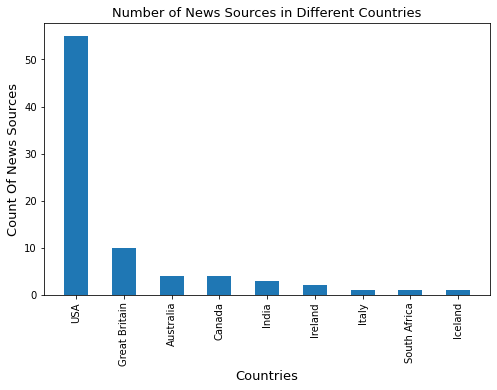

In [21]:
cs_plt = country_sources.plot(kind='bar',figsize=(8,5))
cs_plt.autoscale(axis='x')
cs_plt.set_xlabel(xlabel= 'Countries', fontsize = 13)
cs_plt.set_ylabel(ylabel= 'Count Of News Sources', fontsize = 13)
cs_plt.set_title('Number of News Sources in Different Countries', fontsize=13)

#### It can be observed that USA dominates with the most number of English news sources with 55 in number. European countries like Great Britain, Ireland, Italy, Iceland have a few (10 or less) English news sources from their origin.

### Categorical Distribution of News Sources

In [22]:
categorical_sources = sources['category'].value_counts() #find the number of each sources for different categories
cs_percent = round(100 * (categorical_sources/categorical_sources.sum()),1) #evaluate the percentage of categorical sources

In [23]:
#Plotting a pie-chart for the distribution of news sources based on categories
fig = px.pie(cs_percent, names= sources['category'], title='Categorical distribution of News Sources')
fig.update_traces(textinfo='percent+label')
fig.show() #please rerun this code or refer .html file if the pie chart below does not show

#### It is derived from the above chart that half of the English news sources belong to the 'General' category. Sports and Technology take the second and third place with about 13.6% and 12.3% of the unique news sources present in the sources dataset.

### Exploring the articles dataset

### The most frequent words in the article titles

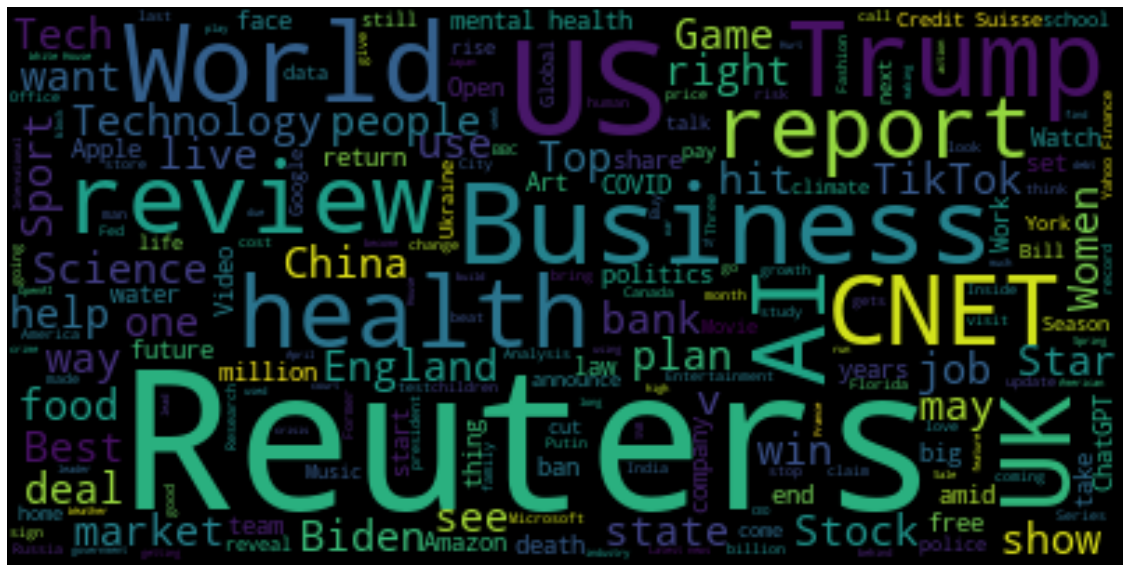

In [24]:
title_words = " ".join(i for i in articles_df.title)
#print(title_words)
stop_words = set(STOPWORDS) #collecting and removing stop words for efficient results
stop_words.update(["will", "now", "back", "say", "new", "says", "day", "know", "need", "make","first","u","week","year","time"])
stop_words.update(stopwords.words('english'))
#print(stop_words)
wordcloud = WordCloud(stopwords = stop_words, background_color="black", max_font_size=70).generate(title_words)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### It is noticed from the above word cloud that the frequently used words in the article titles are Reuters, Trump, health, US, AI, CNET, etc. This word cloud has been generated after eliminating a set of stop words from all the article titles as they do not add any value.

### Authors with the most written articles and their corresponding news source 

In [25]:
authors = articles_df[articles_df['author']!= 'Unknown']
author_counts = authors['author'].value_counts()
author_counts[:10]

info@hypebeast.com (Hypebeast)      76
https://www.facebook.com/bbcnews    60
Science X                           29
The Associated Press                26
PR Newswire                         24
PSFK                                21
Al Jazeera                          19
BeauHD                              18
Reuters                             17
msmash                              17
Name: author, dtype: int64

In [26]:
article_source= articles_df.groupby(['author','source_name']).size().to_frame('count').reset_index().sort_values(by='count', ascending=False)
temp = article_source[article_source['author']!='Unknown']
as_count = temp[:10]

Text(0.5, 1.0, 'Authors with the most number of articles')

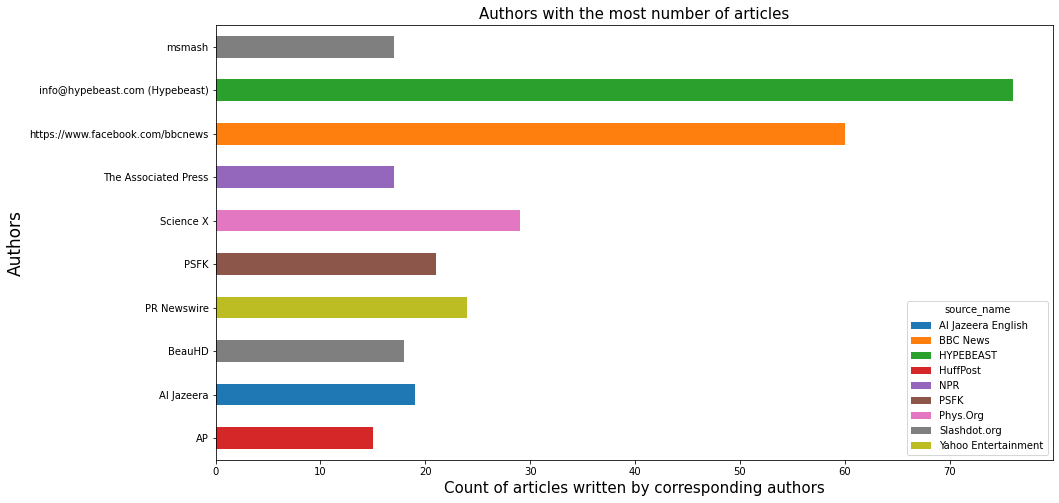

In [27]:
df= as_count.groupby(['author','source_name']).sum().unstack('source_name')
df.columns = df.columns.droplevel()
df_plt = df.plot(kind='barh', stacked=True, figsize = (15,8))
df_plt.set_xlabel(xlabel= 'Count of articles written by corresponding authors', fontsize = 15)
df_plt.set_ylabel(ylabel= 'Authors', fontsize = 17)
df_plt.set_title('Authors with the most number of articles', fontsize=15)

#### The above graph visualizes the top 10 authors with the highest number of articles and their corresponding source name. It is observed that info@hypebeast.com (Hypebeast) is the author who has written the most number of articles i.e, 76 and this author belongs to the source HYPEBEAST.

### Distribution of articles based on each type of article

In [28]:
article_types = articles_df['article_type'].value_counts()
article_types

science          600
general          500
health           500
technology       500
business         400
sports           400
entertainment    400
international    200
politics         200
finance          100
weather          100
jobs             100
music            100
local            100
crime            100
legal            100
art              100
lifestyle        100
food             100
fashion          100
disasters        100
Name: article_type, dtype: int64

Text(0.5, 1.0, 'Number of Articles for each Type of Article')

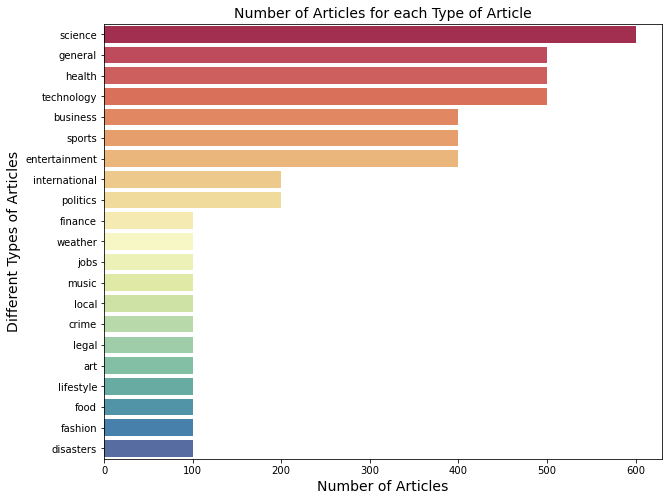

In [29]:
mp.rcParams['figure.figsize'] = (10, 8)
at_plt = sb.countplot(y = 'article_type', data = articles_df, order = articles_df.article_type.value_counts().index, palette = 'Spectral')
at_plt.set_xlabel(xlabel= 'Number of Articles', fontsize = 14)
at_plt.set_ylabel(ylabel= 'Different Types of Articles', fontsize = 14)
at_plt.set_title('Number of Articles for each Type of Article', fontsize=14)

#### It is understood from the above representation that the highest number of articles belong to the 'Science' type with 600 articles. There are 500 news articles for General, Health and Technology each. In the third spot, there are three articles types - Business, Sports and Entertainment with 400 news articles each. 

### Various types of articles published for each date

Text(0.5, 1.0, 'Different types of articles published on each date')

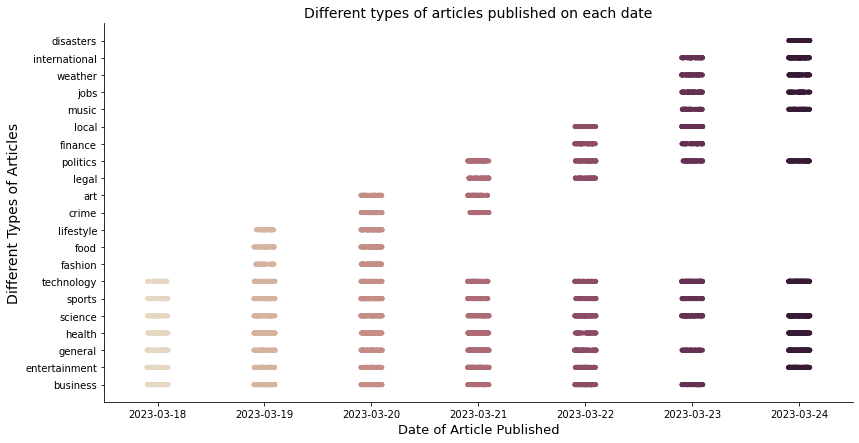

In [30]:
sb.catplot(data=articles_df, x="published_date", y="article_type", height=6, aspect=2, palette="ch:.25")
plt.xlabel(xlabel= 'Date of Article Published', fontsize = 13)
plt.ylabel(ylabel= 'Different Types of Articles', fontsize = 14)
plt.title('Different types of articles published on each date', fontsize=14)

#### The above catplot gives us the different types of articles published on that particular date. For example, on 2023-03-22, there were entertainment, health, technology, business, finance, etc. related articles published. Similarly, it can be understood for dates of the week as well.

### Minimum, Maximum and Average number of words in articles for each published date

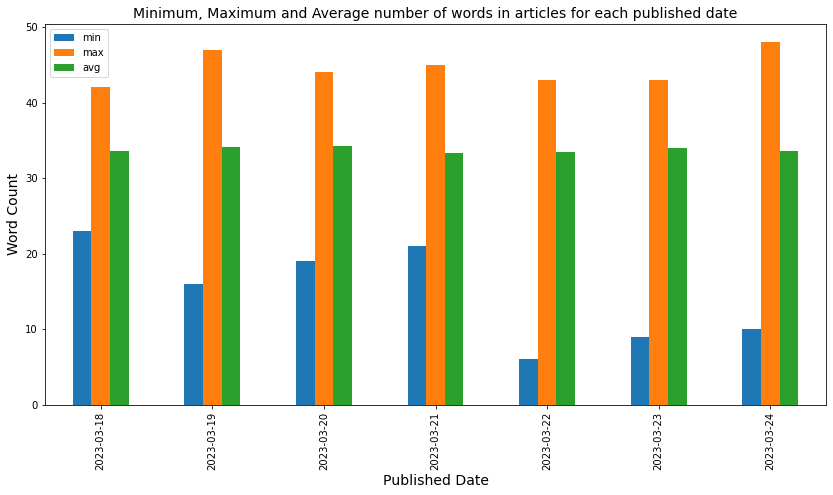

In [31]:
x = articles_df.groupby('published_date')['article_word_count'].min().to_frame()
y = articles_df.groupby('published_date')['article_word_count'].max().to_frame()
z = articles_df.groupby('published_date')['article_word_count'].mean().to_frame()
mmm = pd.DataFrame()
mmm['min'] = x
mmm['max'] = y
mmm['avg'] = z
#print(mmm)

mmm.plot( y=["min", "max", "avg"], kind = 'bar', figsize = (14,7), legend=True)
plt.xlabel(xlabel= 'Published Date', fontsize = 14)
plt.ylabel(ylabel= 'Word Count', fontsize = 14)
plt.title('Minimum, Maximum and Average number of words in articles for each published date', fontsize=14)
plt.show()

#### The above graph gives the minimum, maximum and the average word count in all the articles for each published date. It can be noticed that the minimum word count is less than 10 on two dates. The maximum word count is greater than 40 for all the dates. The average article word count ranges between 33 to 35 for all the published dates.

### Total word count trend of articles for each published date

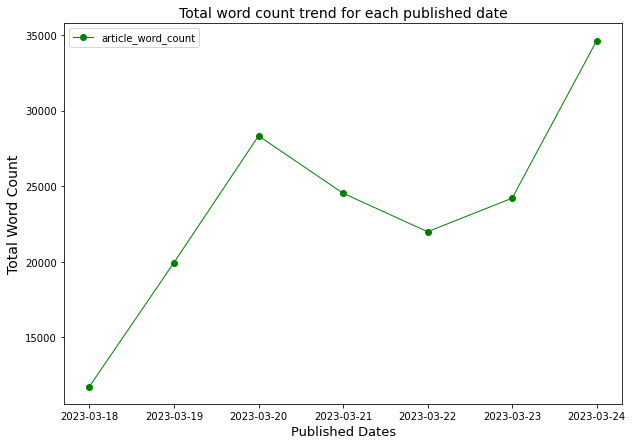

In [32]:
wordcount_variation = articles_df.groupby('published_date')['article_word_count'].sum()
#print(wordcount_variation)
wordcount_viz = wordcount_variation.to_frame()
wordcount_viz.plot(linewidth = 1.0, figsize = (10,7), style = 'go-')
plt.xlabel(xlabel= 'Published Dates', fontsize = 13)
plt.ylabel(ylabel= 'Total Word Count', fontsize = 14)
plt.title('Total word count trend for each published date', fontsize=14)
plt.show()

#### The above line graph depicts how the total word count of all the articles varies from one published date to another. For the specified 7 dates, the total word count sees a steep increase for the first 3 dates, takes a dip for the next 2 dates and finally reaches its peak on the last date. It is noticed that the least value of total word count is less than 12k on 2023-03-18 and the highest on 2023-03-24 with almost 35k. 

### Top 5 news sources

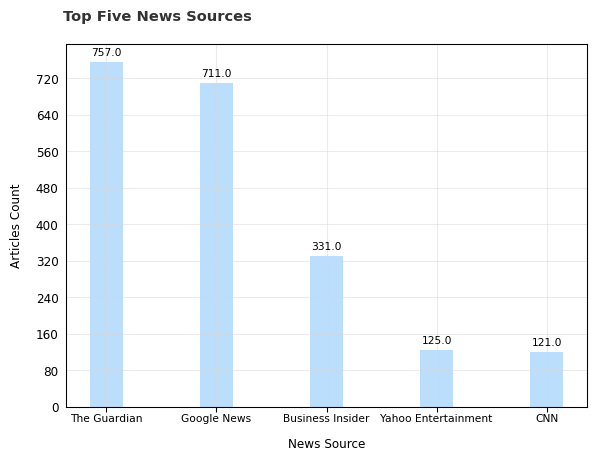

In [33]:
# evalaute the top 4 news source with value_counts, put the news source and its values in a dataframe and finally visualize it
top_sources = articles_df['source_name'].value_counts()
top_sources = top_sources[:5]
ts_df = pd.DataFrame() 
ts_df['News Source'] = top_sources.index
ts_df['Article Count'] = top_sources.to_list()
#print(ts_df)

fig, ax = plt.subplots(figsize=(7,5), dpi = 96)
bar1 = ax.bar(ts_df['News Source'], ts_df['Article Count'], width=0.3, color = "#bbdefc")
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)
ax.set_xlabel('News Source', fontsize=9, labelpad=10) 
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=8, labelrotation=0)
labels = ['The Guardian', 'Google News', 'Business Insider', 'Yahoo Entertainment', 'CNN']
ax.set_xticks(ts_df['News Source'], labels)

ax.set_ylabel('Articles Count', fontsize=9, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=9)
ax.bar_label(bar1, labels=[f'{e:,.1f}' for e in ts_df['Article Count']], padding=3, color='black', fontsize=8) 
bar2 = ax.text(x=0.12, y=.93, s="Top Five News Sources", transform=fig.transFigure, ha='left', fontsize=11, weight='bold', alpha=.8)
plt.show()

#### The top 5 news sources is evaluated by obtaining the news sources with the greatest number of articles. The leading news source is The Guardian with 757 news articles. 

### Top 3 news sources for each type of article

In [34]:
types = articles_df['article_type'].unique() #identify unique article types
types = types.tolist()
article_source = {}

In [35]:
for at in types:
    at_df = articles_df[articles_df['article_type'] == at]
    source_names = at_df['source_name'].value_counts().index
    #print(source_names[:3])
    temp = source_names.tolist()
    article_source[at] = temp[:3] #select top 3 news sources
#article_source

In [36]:
#print the output in a tabular format
print ('+------------------------------------------------------------------------------------------+')
print("| {:<15} | {:<20} | {:<22} | {:<22} |".format('ARTICLE TYPE', 'SOURCE 1', 'SOURCE 2', 'SOURCE 3'))
print ('+------------------------------------------------------------------------------------------+')
for key, value in article_source.items():
    at = key.upper()
    s1, s2, s3 = value
    print("| {:<15} | {:<20} | {:<22} | {:<22} |".format(at, s1, s2, s3))
    print ('+------------------------------------------------------------------------------------------+')

+------------------------------------------------------------------------------------------+
| ARTICLE TYPE    | SOURCE 1             | SOURCE 2               | SOURCE 3               |
+------------------------------------------------------------------------------------------+
| BUSINESS        | The Guardian         | Business Insider       | Google News            |
+------------------------------------------------------------------------------------------+
| ENTERTAINMENT   | Google News          | Deadline               | Yahoo Entertainment    |
+------------------------------------------------------------------------------------------+
| GENERAL         | Google News          | The Guardian           | Business Insider       |
+------------------------------------------------------------------------------------------+
| HEALTH          | The Guardian         | Business Insider       | CNET                   |
+---------------------------------------------------------------------

#### Top 3 news sources for different types of articles can be inferred from the above tabular visualization. It is noticed that The Guardian and Google News being the leading news sources make it to the Top 3 for almost all the article types.

## Conclusion

An elaborate analysis has been performed on the English language news sources and news articles for a week's worth data.
It is clear from the above analysis that 'USA' is the country dominating with the highest number of English news sources.
Out of all the news sources, 'The Guardian' and 'Google News' produce most of the articles of different types.
Most of these articles in the dataset belong to the 'Science' category.
The author with the highest number of articles in the articles dataset is 'info@hypebeast.com' from the news source 'Hypebeast'.
The average word count of the content for each of these articles is about 35 from which it can be derived that these are short articles giving us only brief information.

Some of the challenges that were faced while working on this project were:
The news API only gives out a maximum of 100 results in 1 API call for the free version. Therefore, 50 API calls had to be made in order to get sufficient data for the analysis. This process was time consuming.
A maximum of the 100 API calls can be performed in a day with one API key.
Most of the columns in the dataset had categorical data which limited the analysis options.
Few of the columns contained a lot of missing values or were not useful for the analysis.

For the further analysis:
The article content word count for each type of article can be evaluated.
A sentiment analysis could be performed with the article word content and understand what the news source is trying to convey with the articles and headlines.
A larger dataset with less API calls and more numerical data would yeild in a more efficient analysis. If the dataset can be generated for a large period of time, the news sources that are generating enormous number of articles in different categories can be analysed as to how they are performing in the market based on the 'article views or notices'. 